# Import packages

In [1]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import importlib

import pandas as pd
import seaborn as sns

# Load data and plot

In [2]:
data = pd.read_csv('evaluation_nn.csv')

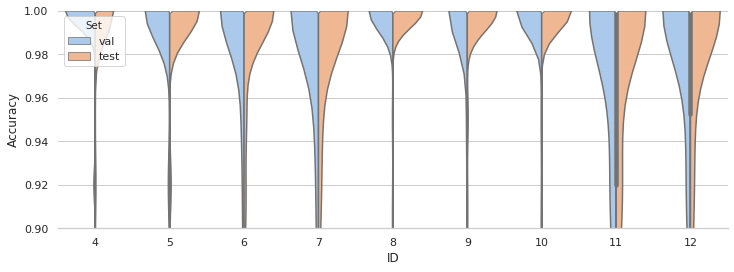

In [22]:
plt.rcParams['figure.figsize'] = 12,4
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
ax=sns.violinplot(x="Experiment", y="Accuracy", hue="Set",
               split=True,
               cut=0,
               #palette={"val": "m", "test": "r"},
               whis=[0, 100],
               data=data)

ax.set(ylim=(0.9, 1.0))
ax.set_xlabel("ID")
sns.despine(left=True)

plt.savefig("violin_nn.svg")

In [3]:
mean_acc_val = []
mean_acc_test = []
indices = [4,5,6,7,8,9,10,11,12]
indices_str = x = np.array(['4','5','6','7','8','9','10','11','12'])

for i in indices:
    mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
    mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())

<ipython-input-3-592374ffe423>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_val.append(data[data.Experiment==i][data.Set=='val']['Accuracy'].mean())
<ipython-input-3-592374ffe423>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_acc_test.append(data[data.Experiment==i][data.Set=='test']['Accuracy'].mean())


In [37]:
def show_values_on_bars(axs, h_v="v", space=-0.4, offset = 0.001):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + offset
                value = round(p.get_height(),2)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + offset
                value = round(p.width(),2)
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

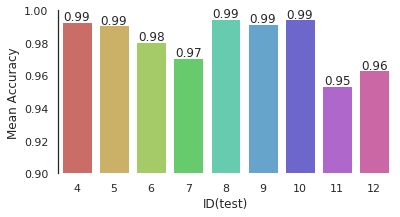

In [58]:
plt.rcParams['figure.figsize'] = 6,3
sns.set(style="white")#, context="talk")
ax = sns.barplot(x=indices_str, y=mean_acc_test, order=indices_str, palette="hls")

ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("ID(test)")
ax.set(ylim=(0.9, 1.0))

show_values_on_bars(ax)
sns.despine(bottom=True)

plt.savefig("barblot_nn_test.svg")